In [ ]:
# GLU Variants Performance Visualization
# This notebook generates plots showing perplexity comparison and compound effect over sequences

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')

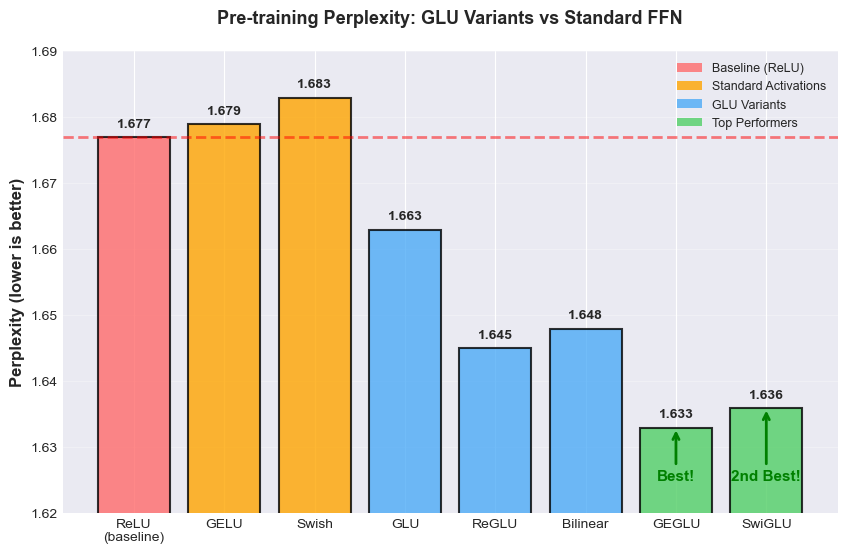

In [10]:
# Data for perplexity comparison
variants = ['ReLU\n(baseline)', 'GELU', 'Swish', 'GLU', 'ReGLU', 
            'Bilinear', 'GEGLU', 'SwiGLU']
perplexity = [1.677, 1.679, 1.683, 1.663, 1.645, 1.648, 1.633, 1.636]
colors = ['#ff6b6b', '#ffa500', '#ffa500', '#4dabf7', '#4dabf7', 
          '#4dabf7', '#51cf66', '#51cf66']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
bars = ax1.bar(variants, perplexity, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.axhline(y=1.677, color='red', linestyle='--', alpha=0.5, label='Baseline (1.677)', linewidth=2)

# Labels and styling
ax1.set_ylabel('Perplexity (lower is better)', fontsize=12, fontweight='bold')
ax1.set_title('Pre-training Perplexity: GLU Variants vs Standard FFN', fontsize=13, fontweight='bold', pad=20)
ax1.set_ylim(1.62, 1.69)
ax1.grid(axis='y', alpha=0.3)

# Value labels
for bar, val in zip(bars, perplexity):
    ax1.text(bar.get_x() + bar.get_width()/2., val + 0.001, f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Annotations
ax1.annotate('Best!', xy=(6, 1.633), xytext=(6, 1.625),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, fontweight='bold', color='green', ha='center')
ax1.annotate('2nd Best!', xy=(7, 1.636), xytext=(7, 1.625),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, fontweight='bold', color='green', ha='center')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#ff6b6b', alpha=0.8, label='Baseline (ReLU)'),
    Patch(facecolor='#ffa500', alpha=0.8, label='Standard Activations'),
    Patch(facecolor='#4dabf7', alpha=0.8, label='GLU Variants'),
    Patch(facecolor='#51cf66', alpha=0.8, label='Top Performers')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.show()


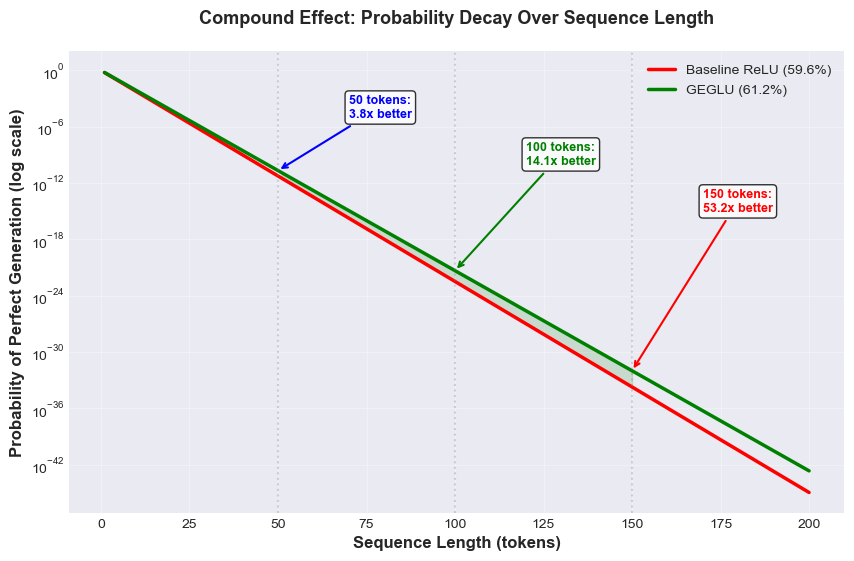

In [11]:
# Sequence length and probability decay
sequence_lengths = np.arange(1, 201)
baseline_prob = 0.596 ** sequence_lengths
geglu_prob = 0.612 ** sequence_lengths

fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot curves
ax2.plot(sequence_lengths, baseline_prob, 'r-', label='Baseline ReLU (59.6%)', linewidth=2.5)
ax2.plot(sequence_lengths, geglu_prob, 'g-', label='GEGLU (61.2%)', linewidth=2.5)

# Styling
ax2.set_xlabel('Sequence Length (tokens)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability of Perfect Generation (log scale)', fontsize=12, fontweight='bold')
ax2.set_title('Compound Effect: Probability Decay Over Sequence Length', fontsize=13, fontweight='bold', pad=20)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')
ax2.legend(loc='upper right', fontsize=10)

# Shaded improvement region
ax2.fill_between(sequence_lengths[50:150], baseline_prob[50:150], geglu_prob[50:150], alpha=0.15, color='green')

# Annotate improvement factors
for idx, x in enumerate([50, 100, 150]):
    ratio = geglu_prob[x-1] / baseline_prob[x-1]
    ax2.annotate(f'{x} tokens:\n{ratio:.1f}x better',
                 xy=(x, geglu_prob[x-1]), 
                 xytext=(x + 20, 10**(-idx*5 - 5)),
                 arrowprops=dict(arrowstyle='->', lw=1.5, color=['blue', 'green', 'red'][idx]),
                 fontsize=9, fontweight='bold', color=['blue', 'green', 'red'][idx],
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    ax2.axvline(x=x, color='gray', linestyle=':', alpha=0.3)

plt.show()


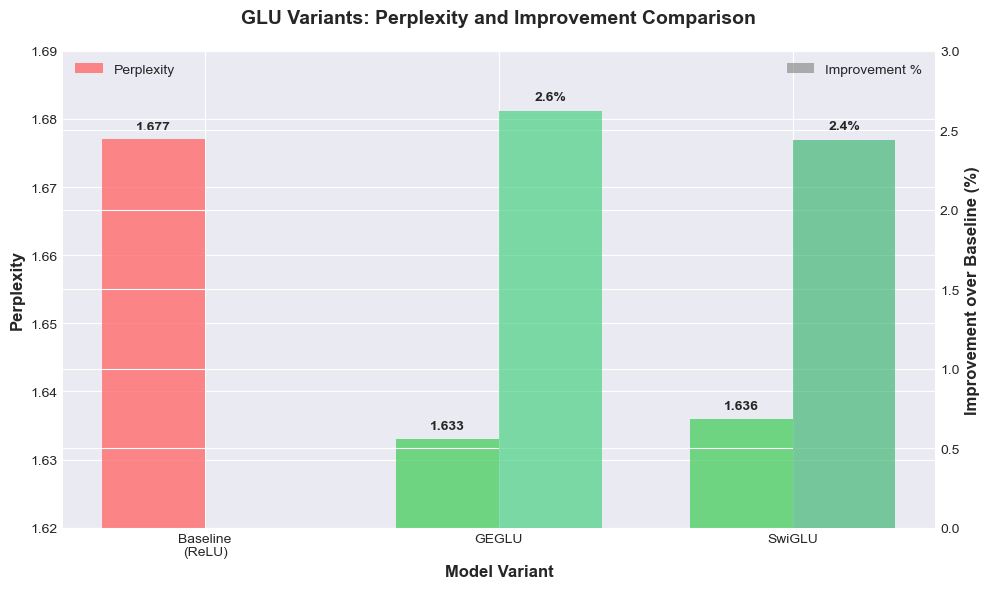

In [12]:
# Simple comparison of top variants
variants = ['Baseline\n(ReLU)', 'GEGLU', 'SwiGLU']
perplexity = [1.677, 1.633, 1.636]
improvements = [0, 2.62, 2.44]

x = np.arange(len(variants))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, perplexity, width, label='Perplexity', 
               color=['#ff6b6b', '#51cf66', '#51cf66'], alpha=0.8)

ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, improvements, width, label='Improvement %', 
                color=['gray', '#2ecc71', '#27ae60'], alpha=0.6)

# Labels
ax.set_xlabel('Model Variant', fontsize=12, fontweight='bold')
ax.set_ylabel('Perplexity', fontsize=12, fontweight='bold')
ax2.set_ylabel('Improvement over Baseline (%)', fontsize=12, fontweight='bold')
ax.set_title('GLU Variants: Perplexity and Improvement Comparison', fontsize=14, fontweight='bold', pad=20)

ax.set_xticks(x)
ax.set_xticklabels(variants)
ax.set_ylim(1.62, 1.69)
ax2.set_ylim(0, 3)

# Value labels
for bar, val in zip(bars1, perplexity):
    ax.text(bar.get_x() + bar.get_width()/2., val + 0.001, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

for bar, val in zip(bars2, improvements):
    if val > 0:
        ax2.text(bar.get_x() + bar.get_width()/2., val + 0.05, f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
